In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ss
%matplotlib inline

In [45]:
df = pd.read_csv('Donor Raw Data_ML with Python.csv')

In [46]:
df.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,.,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,04,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET_B                     19372 non-null  int64  
 1   TARGET_D                     4843 non-null   float64
 2   CONTROL_NUMBER               19372 non-null  int64  
 3   MONTHS_SINCE_ORIGIN          19372 non-null  int64  
 4   DONOR_AGE                    14577 non-null  float64
 5   IN_HOUSE                     19372 non-null  int64  
 6   URBANICITY                   19372 non-null  object 
 7   SES                          19372 non-null  object 
 8   CLUSTER_CODE                 19372 non-null  object 
 9   HOME_OWNER                   19372 non-null  object 
 10  DONOR_GENDER                 19372 non-null  object 
 11  INCOME_GROUP                 14980 non-null  float64
 12  PUBLISHED_PHONE              19372 non-null  int64  
 13  OVERLAY_SOURCE  

In [48]:
df.describe()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,19372.000000,4843.000000,19372.000000,19372.000000,14577.000000,19372.000000,14980.000000,19372.000000,19372.000000,10562.000000,...,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,0.250000,15.624344,96546.225377,73.409973,58.919051,0.073198,3.907543,0.497729,3.361656,5.005397,...,11.587876,19.208808,7.620932,16.584199,5.367128,12.901869,18.191152,69.482088,12.858338,5.273591
std,0.433024,12.445137,55830.643871,41.255574,16.669382,0.260469,1.864796,0.500008,9.503481,2.815386,...,15.116893,16.101128,7.959786,11.977558,1.264205,4.642072,4.033065,37.568169,8.787758,4.607063
min,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,15.000000,1.360000,0.000000
25%,0.000000,10.000000,48289.000000,29.000000,47.000000,0.000000,2.000000,0.000000,0.000000,3.000000,...,5.000000,12.000000,3.000000,10.000000,5.000000,11.000000,16.000000,33.000000,8.000000,2.000000
50%,0.000000,13.000000,96937.000000,65.000000,60.000000,0.000000,4.000000,0.000000,0.000000,5.000000,...,10.000000,16.000000,5.000000,15.000000,6.000000,12.000000,18.000000,65.000000,11.200000,4.000000
75%,0.250000,20.000000,145429.500000,113.000000,73.000000,0.000000,5.000000,1.000000,3.000000,7.000000,...,15.000000,21.000000,10.000000,20.000000,6.000000,13.000000,20.000000,105.000000,15.000000,8.000000
max,1.000000,200.000000,191779.000000,137.000000,87.000000,1.000000,7.000000,1.000000,241.000000,9.000000,...,997.000000,1000.000000,450.000000,450.000000,17.000000,64.000000,27.000000,260.000000,450.000000,41.000000


In [49]:
df.columns

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES', 'CLUSTER_CODE',
       'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE',
       'OVERLAY_SOURCE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK',
       'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER

<Axes: >

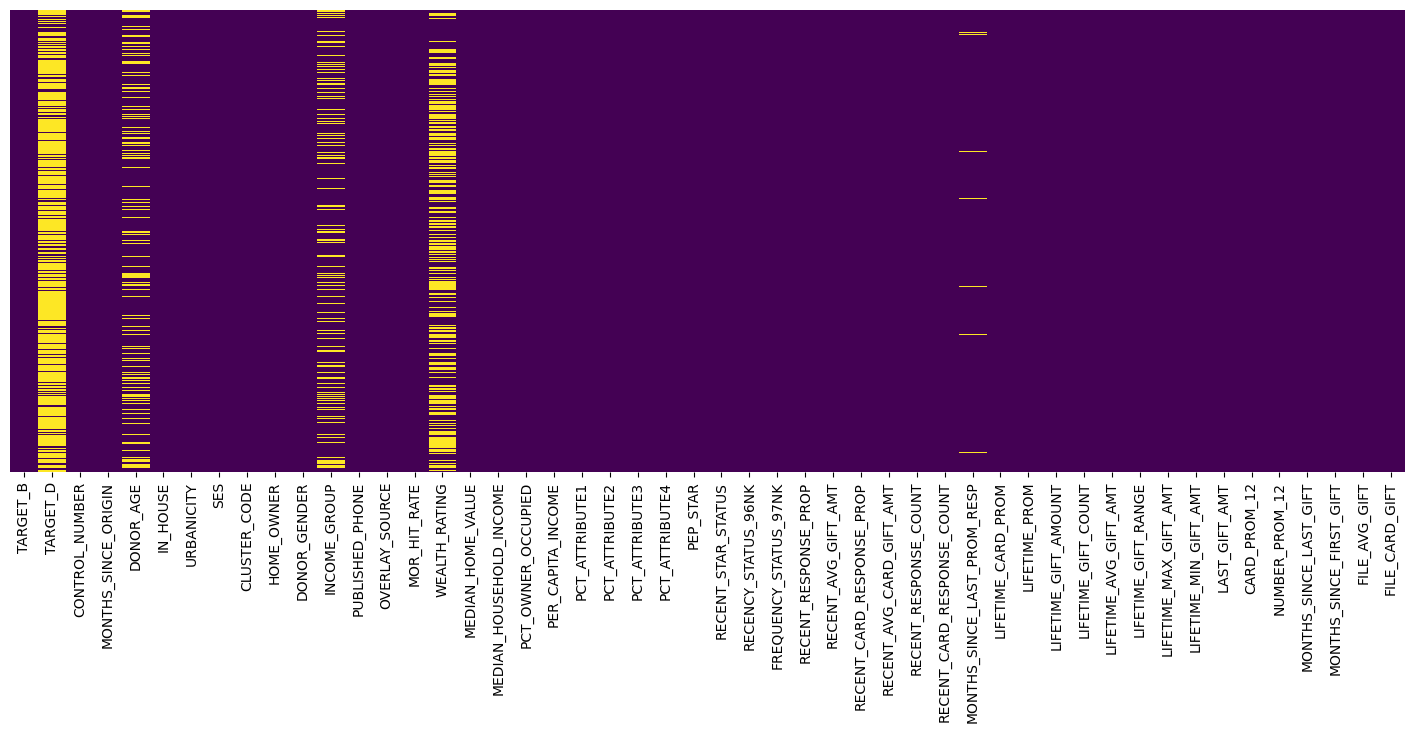

In [50]:
plt.figure(figsize=(18,6))
ss.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [51]:

def impute_age(cols):
    Age = cols[0]
    
    if pd.isnull(Age):
        return df['DONOR_AGE'].median()
    else:
        return Age

In [52]:
#Now to apply the function to complete themissing age fields

In [53]:
df['DONOR_AGE'] = df[['DONOR_AGE']].apply(impute_age,axis=1)

In [54]:
#To complete the income group levels, I will be using the median income_group, 
#using the same method as used to complete missing age fields


In [55]:
def impute_ig(cols):
    ig = cols[0]
    
    if pd.isnull(ig):
        return df['INCOME_GROUP'].median()
    else:
        return ig

In [56]:
df['INCOME_GROUP'] = df[['INCOME_GROUP']].apply(impute_ig,axis=1)

In [57]:
#To fill in missing values in wealth rating,exploring the wealth rating of different donors based on their income group
# using seaborns's boxplot

<Axes: xlabel='INCOME_GROUP', ylabel='WEALTH_RATING'>

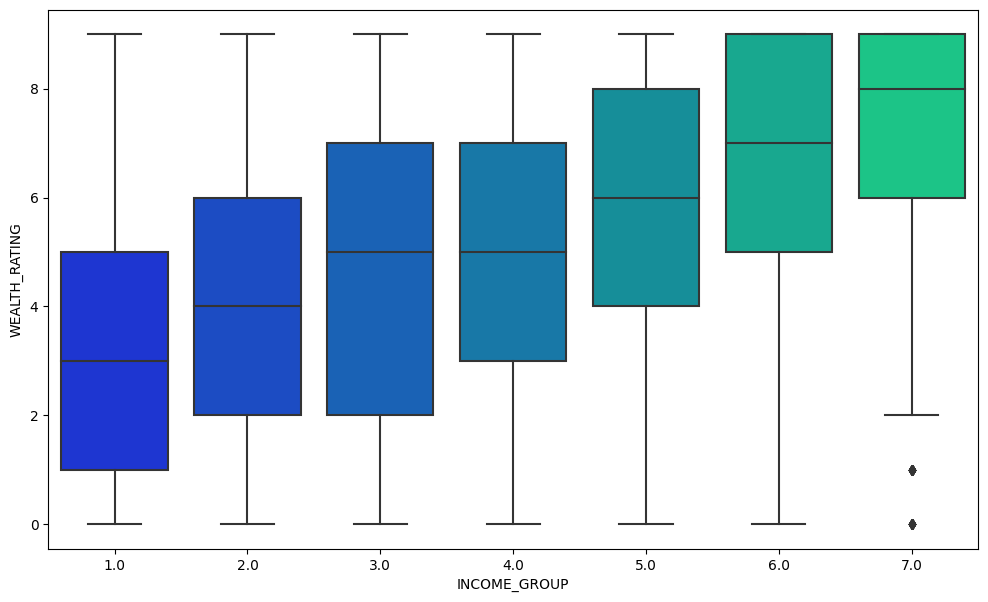

In [58]:
plt.figure(figsize=(12, 7))
ss.boxplot(y='WEALTH_RATING',x='INCOME_GROUP',data=df,palette='winter')

In [59]:
def impute_wealthr(cols):
    wealthr = cols[0]
    incomeg = cols[1]
    
    if pd.isnull(wealthr):

        if incomeg == 1:
            return 3

        elif incomeg == 2:
            return 4
        
        elif incomeg == 3:
            return 5
        
        elif incomeg == 4:
            return 5
        
        elif incomeg == 5:
            return 6
        
        elif incomeg == 6:
            return 7
        
        else:
            return 8

    else:
        return wealthr

In [60]:
df['WEALTH_RATING'] = df[['WEALTH_RATING','INCOME_GROUP']].apply(impute_wealthr,axis=1)

In [61]:
#Missing fields in MONTHS_SINCE_LAST_PROM_RESP
#As these prospects have not responded to a promotion, and as there are 246 such missing fields, i am deleting them, 
#as the effect of this on the training model will be negligible

In [62]:
df['MONTHS_SINCE_LAST_PROM_RESP'] = df['MONTHS_SINCE_LAST_PROM_RESP'].replace('', np.nan)
df = df.dropna(axis=0, subset=['MONTHS_SINCE_LAST_PROM_RESP'])

In [63]:
df['CLUSTER_CODE'].replace(' .',0,inplace = True)

Categorical Features

Notice that the URBANICITY, HOME_OWNER, DONOR_GENDER, OVERLAY_SOURCE, RECENCY_STATUS column are categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

In [64]:
df.columns

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES', 'CLUSTER_CODE',
       'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE',
       'OVERLAY_SOURCE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK',
       'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER

In [65]:
#Now to use pd.get_dummies to transform categorical columns

In [66]:

expanded_df =pd.get_dummies(df, columns=['URBANICITY','SES','HOME_OWNER', 'DONOR_GENDER', 'OVERLAY_SOURCE', 'RECENCY_STATUS_96NK'], drop_first = True)
print(expanded_df.head())

   TARGET_B  TARGET_D  CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE   
0         0       NaN               5                  101       87.0  \
1         1      10.0              12                  137       79.0   
2         0       NaN              37                  113       75.0   
3         0       NaN              38                   92       60.0   
4         0       NaN              41                  101       74.0   

   IN_HOUSE CLUSTER_CODE  INCOME_GROUP  PUBLISHED_PHONE  MOR_HIT_RATE  ...   
0         0            0           2.0                0             0  ...  \
1         0           45           7.0                0             0  ...   
2         0           11           5.0                0             0  ...   
3         0           04           6.0                1             0  ...   
4         0           49           2.0                1             8  ...   

   DONOR_GENDER_M  DONOR_GENDER_U  OVERLAY_SOURCE_M  OVERLAY_SOURCE_N   
0            True  

In [67]:
#Checking new column names
expanded_df.columns

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'CLUSTER_CODE', 'INCOME_GROUP',
       'PUBLISHED_PHONE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'FREQUENCY_STATUS_97NK',
       'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12',
       'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT',
       'FIL

Train Test Split
Now its time to split our data into a training set and a testing set. We will use SKLearn to do this.

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X = expanded_df.drop(['TARGET_B','TARGET_D'],axis=1)
y= expanded_df['TARGET_B']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Training the Random Forest model
Now its time to train our model!

Below we create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier (n_estimators = 100)

rf2 = RandomForestClassifier (n_estimators = 50, max_leaf_nodes= 5,
            min_samples_leaf=20, min_samples_split=5)

rf.fit(X_train,y_train.values.ravel())

rf2.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_leaf_nodes=5, min_samples_leaf=20,
                       min_samples_split=5, n_estimators=50)

In [72]:
accuracy = rf.score(X_test, y_test)
print('My first model accuracy is = {}%'.format(accuracy*100))

accuracy = rf2.score(X_test, y_test)
print('My second model accuracy is = {}%'.format(accuracy*100))

My first model accuracy is = 74.53816660857441%
My second model accuracy is = 74.59044963401882%


In [73]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.041852)
2. feature 9 (0.040221)
3. feature 12 (0.038319)
4. feature 10 (0.037042)
5. feature 11 (0.033028)
6. feature 16 (0.032691)
7. feature 14 (0.032690)
8. feature 15 (0.032039)
9. feature 2 (0.030792)
10. feature 31 (0.030473)
11. feature 40 (0.030159)
12. feature 20 (0.029554)
13. feature 4 (0.028965)
14. feature 29 (0.028920)
15. feature 28 (0.027951)
16. feature 21 (0.027912)
17. feature 39 (0.027481)
18. feature 27 (0.022411)
19. feature 37 (0.022322)
20. feature 38 (0.021930)
21. feature 23 (0.021671)
22. feature 22 (0.021627)
23. feature 32 (0.020560)
24. feature 30 (0.019782)
25. feature 26 (0.019184)
26. feature 35 (0.019090)
27. feature 41 (0.018858)
28. feature 8 (0.018471)
29. feature 7 (0.017999)
30. feature 33 (0.016760)
31. feature 5 (0.015961)
32. feature 24 (0.014404)
33. feature 34 (0.013943)
34. feature 1 (0.013588)
35. feature 25 (0.011593)
36. feature 13 (0.011574)
37. feature 36 (0.011090)
38. feature 19 (0.009477)
39. feature 

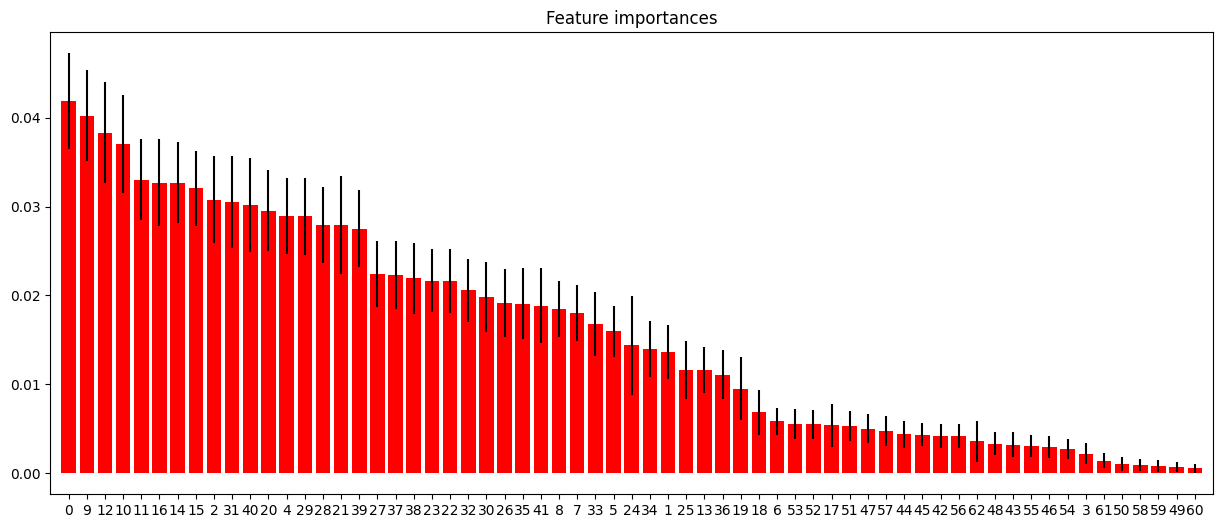

In [74]:
# Plot the feature importances of the forest
plt.figure(figsize=(15,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [75]:
#Now we proceed to read the prospectie donor file, and use the model created above to get the desired outcome
df = pd.read_csv('Prospective Donor_ML with Python.csv')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CONTROL_NUMBER               2148 non-null   int64  
 1   MONTHS_SINCE_ORIGIN          2148 non-null   int64  
 2   DONOR_AGE                    1619 non-null   float64
 3   IN_HOUSE                     2148 non-null   int64  
 4   URBANICITY                   2148 non-null   object 
 5   SES                          2148 non-null   object 
 6   CLUSTER_CODE                 2148 non-null   object 
 7   HOME_OWNER                   2148 non-null   object 
 8   DONOR_GENDER                 2148 non-null   object 
 9   INCOME_GROUP                 1667 non-null   float64
 10  PUBLISHED_PHONE              2148 non-null   int64  
 11  OVERLAY_SOURCE               2148 non-null   object 
 12  MOR_HIT_RATE                 2148 non-null   int64  
 13  WEALTH_RATING     

In [77]:
def impute_age(cols):
    Age = cols[0]
    
    if pd.isnull(Age):
        return df['DONOR_AGE'].median()
    else:
        return Age

In [78]:
df['DONOR_AGE'] = df[['DONOR_AGE']].apply(impute_age,axis=1)

In [79]:
def impute_ig(cols):
    ig = cols[0]
    
    if pd.isnull(ig):
        return df['INCOME_GROUP'].median()
    else:
        return ig

In [80]:
df['INCOME_GROUP'] = df[['INCOME_GROUP']].apply(impute_ig,axis=1)

<Axes: xlabel='INCOME_GROUP', ylabel='WEALTH_RATING'>

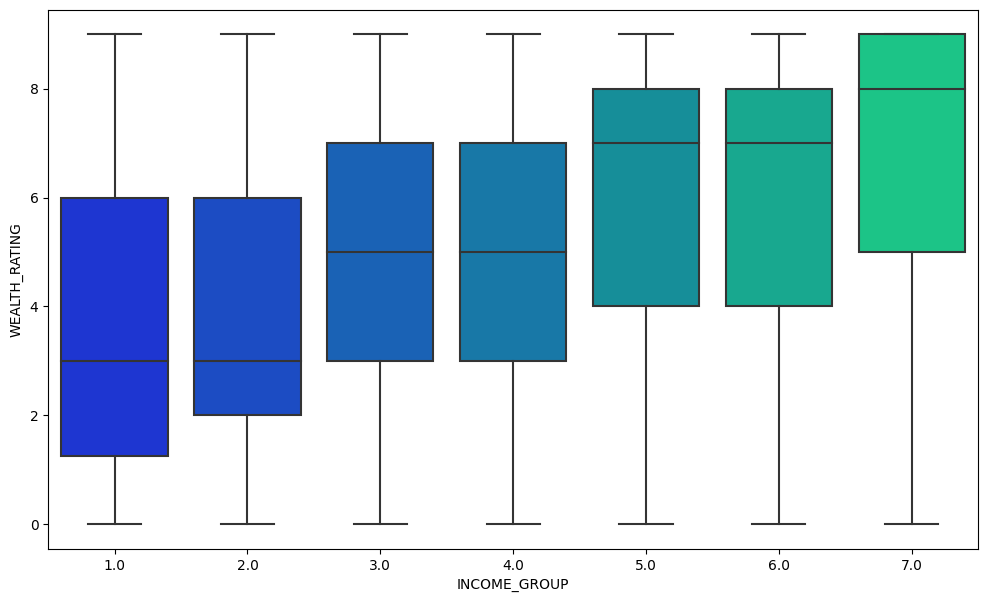

In [81]:
plt.figure(figsize=(12, 7))
ss.boxplot(y='WEALTH_RATING',x='INCOME_GROUP',data=df,palette='winter')

In [82]:
def impute_wealthr(cols):
    wealthr = cols[0]
    incomeg = cols[1]
    
    if pd.isnull(wealthr):

        if incomeg == 1:
            return 3

        elif incomeg == 2:
            return 3
        
        elif incomeg == 3:
            return 5
        
        elif incomeg == 4:
            return 5
        
        elif incomeg == 5:
            return 7
        
        elif incomeg == 6:
            return 7
        
        else:
            return 8

    else:
        return wealthr

In [83]:
df['WEALTH_RATING'] = df[['WEALTH_RATING','INCOME_GROUP']].apply(impute_wealthr,axis=1)

In [84]:
df['MONTHS_SINCE_LAST_PROM_RESP'] = df['MONTHS_SINCE_LAST_PROM_RESP'].replace('', np.nan)
df = df.dropna(axis=0, subset=['MONTHS_SINCE_LAST_PROM_RESP'])

In [85]:
df['CLUSTER_CODE'].replace(' .',0,inplace = True)

In [86]:
expanded_df =pd.get_dummies(df, columns=['URBANICITY','SES','HOME_OWNER', 'DONOR_GENDER', 'OVERLAY_SOURCE', 'RECENCY_STATUS_96NK'], drop_first = True)


In [87]:
expanded_df.columns

Index(['CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE',
       'CLUSTER_CODE', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'MOR_HIT_RATE',
       'WEALTH_RATING', 'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME',
       'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME', 'PCT_ATTRIBUTE1',
       'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4', 'PEP_STAR',
       'RECENT_STAR_STATUS', 'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP',
       'RECENT_AVG_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP',
       'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT',
       'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP',
       'LIFETIME_CARD_PROM', 'LIFETIME_PROM', 'LIFETIME_GIFT_AMOUNT',
       'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT', 'LIFETIME_GIFT_RANGE',
       'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT',
       'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
       'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT', 'FILE_CARD_GIFT',
       'URBANICIT

In [88]:
#We will now predict the outcome of the prospective donors


In [93]:
prediction = pd.Series(rf.predict(X))
survivors = df[['CONTROL_NUMBER']]
survivors['prediction']= prediction
print(survivors.loc[survivors['prediction'] ==0])

      CONTROL_NUMBER  prediction
0                139           0
2                282           0
3                368           0
4                387           0
5                458           0
...              ...         ...
2141          190837           0
2143          190842           0
2144          191056           0
2145          191164           0
2146          191484           0

[1672 rows x 2 columns]


C:\Users\gurve\AppData\Local\Temp\ipykernel_40580\3392805405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survivors['prediction']= prediction


In [94]:
print(survivors.loc[survivors['prediction'] ==0])

      CONTROL_NUMBER  prediction
0                139           0
2                282           0
3                368           0
4                387           0
5                458           0
...              ...         ...
2141          190837           0
2143          190842           0
2144          191056           0
2145          191164           0
2146          191484           0

[1672 rows x 2 columns]


In [95]:
accuracy = rf.score(X, y)
print('My first model accuracy is = {}%'.format(accuracy*100))

My first model accuracy is = 92.36118372895535%


In [96]:
survivors.to_csv("prediction_results.csv")